# Background

- Now have: chiller installed, Zaber fixed but arm removed and needs remounting.
- Want: set up Zaber arm and collect a new, complete set of pole-to-pole measurements.
- Different measurements enumerated in shared Google doc.

In [445]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [446]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import lmfit as lm
#from pandas.api.types import is_numeric_dtype
#from dateutil import parser
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib notebook

# local imports
from plotting import config_plots, datetime_plt
from load_pattern_slow import *
from Zaber_Magnet_Convert import *
# hallprobecalib package
from hallprobecalib.hpcplots import scatter3d
from mu2e.mu2eplots import mu2e_plot3d

# from pandas.api.types import is_numeric_dtype
# from dateutil import parser

config_plots()

In [447]:
ddir = '/home/ckampa/Dropbox/LogFiles/'

# Repeated Scans (2021-06-14)
- Not part of "good" data set -- I think Y, Z not centered

In [448]:
slowfile = ddir+'2021-06-14 093344.txt'

In [449]:
df = load_data(slowfile)

In [450]:
df

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Micron_Y,Zaber_Meas_Encoder_Z,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta,magnet_X_mm,magnet_Y_mm,magnet_Z_mm
Datetime,,,,,,,,,,,,,,,,,,,,
2021-06-14 09:33:45,6/14/2021 9:33:45 AM,192.053817,22.866100,1.048830,0.0,0.0,0.0,0.0,422190.0,164917.96875,366402.0,143125.78125,1629710.0,636605.46875,0.0,0.000000,0.000000,10.900000,105.159766,132.048828
2021-06-14 09:34:52,6/14/2021 9:34:52 AM,192.053760,23.267900,1.048828,0.0,422190.0,366402.0,1629710.0,422190.0,164917.96875,366402.0,143125.78125,1629710.0,636605.46875,67.0,0.018611,0.000775,10.900000,105.159766,132.048828
2021-06-14 09:35:14,6/14/2021 9:35:14 AM,192.053703,23.298350,1.048448,0.0,455340.0,366402.0,1629710.0,455340.0,177867.18750,366402.0,143125.78125,1629710.0,636605.46875,89.0,0.024722,0.001030,23.849219,105.159766,132.048828
2021-06-14 09:35:37,6/14/2021 9:35:37 AM,192.053760,23.327583,1.048254,0.0,488490.0,366402.0,1629710.0,488490.0,190816.40625,366402.0,143125.78125,1629710.0,636605.46875,112.0,0.031111,0.001296,36.798437,105.159766,132.048828
2021-06-14 09:36:32,6/14/2021 9:36:32 AM,192.053760,23.394033,1.048379,0.0,521640.0,366402.0,1629710.0,521640.0,203765.62500,366402.0,143125.78125,1629710.0,636605.46875,167.0,0.046389,0.001933,49.747656,105.159766,132.048828
2021-06-14 09:37:26,6/14/2021 9:37:26 AM,192.053647,23.455233,1.048725,0.0,554790.0,366402.0,1629710.0,554790.0,216714.84375,366402.0,143125.78125,1629710.0,636605.46875,221.0,0.061389,0.002558,62.696875,105.159766,132.048828
2021-06-14 09:40:17,6/14/2021 9:40:17 AM,192.053420,23.616317,1.048443,0.0,455340.0,366402.0,1629710.0,455340.0,177867.18750,366402.0,143125.78125,1629710.0,636605.46875,392.0,0.108889,0.004537,23.849219,105.159766,132.048828
2021-06-14 09:40:39,6/14/2021 9:40:39 AM,192.053590,23.634833,1.048248,0.0,488490.0,366402.0,1629710.0,488490.0,190816.40625,366402.0,143125.78125,1629710.0,636605.46875,414.0,0.115000,0.004792,36.798437,105.159766,132.048828
2021-06-14 09:41:33,6/14/2021 9:41:33 AM,192.053533,23.676267,1.048373,0.0,521640.0,366402.0,1629710.0,521640.0,203765.62500,366402.0,143125.78125,1629710.0,636605.46875,468.0,0.130000,0.005417,49.747656,105.159766,132.048828


In [451]:
df['NMR [T]']

Datetime
2021-06-14 09:33:45    1.048830
2021-06-14 09:34:52    1.048828
2021-06-14 09:35:14    1.048448
2021-06-14 09:35:37    1.048254
2021-06-14 09:36:32    1.048379
2021-06-14 09:37:26    1.048725
2021-06-14 09:40:17    1.048443
2021-06-14 09:40:39    1.048248
2021-06-14 09:41:33    1.048373
2021-06-14 09:42:28    1.048718
2021-06-14 09:44:22    1.048439
2021-06-14 09:44:45    1.048243
2021-06-14 09:45:07    1.048368
2021-06-14 09:46:02    1.048713
2021-06-14 09:47:41    1.048435
2021-06-14 09:48:03    1.048239
2021-06-14 09:48:58    1.048362
2021-06-14 09:49:52    1.048707
2021-06-14 09:50:58    1.048430
2021-06-14 09:51:21    1.048234
2021-06-14 09:52:16    1.048358
2021-06-14 09:53:11    1.048703
2021-06-14 10:16:02    1.048398
2021-06-14 10:16:24    1.048201
2021-06-14 10:17:18    1.048323
2021-06-14 10:18:13    1.048668
2021-06-14 10:20:12    1.048393
2021-06-14 10:20:35    1.048196
2021-06-14 10:20:57    1.048319
2021-06-14 10:21:50    1.048663
2021-06-14 10:24:46    1.048387

<IPython.core.display.Javascript object>


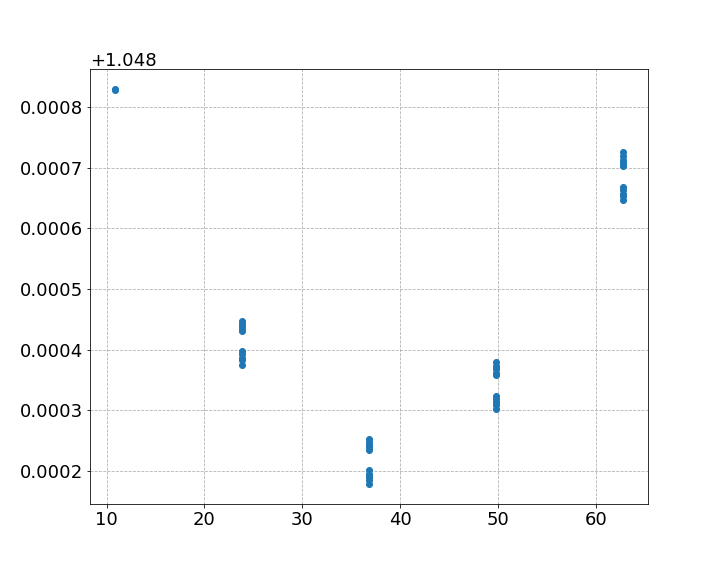

In [452]:
fig, ax = plt.subplots()

ax.scatter(df['magnet_X_mm'], df['NMR [T]'])

<IPython.core.display.Javascript object>


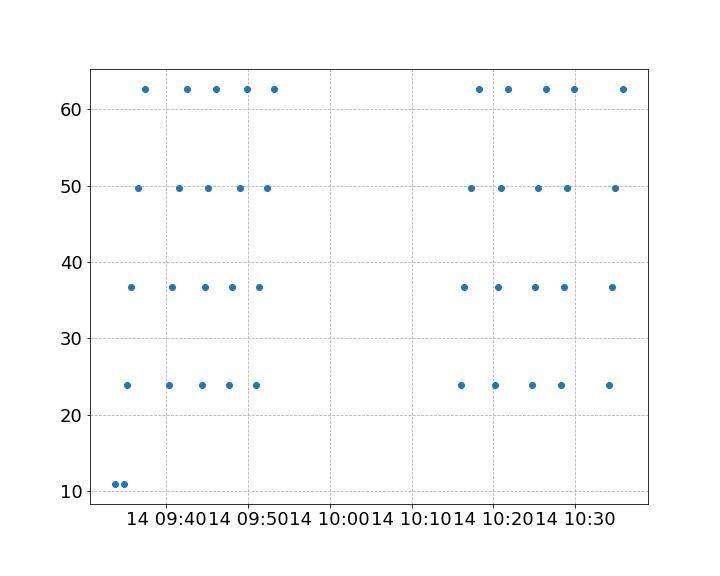

In [454]:
fig, ax = plt.subplots()

ax.scatter(df.index, df['magnet_X_mm'])

In [456]:
df[np.concatenate([[False], np.diff(df['magnet_X_mm'])<0])]['magnet_X_mm']

Datetime
2021-06-14 09:40:17    23.849219
2021-06-14 09:44:22    23.849219
2021-06-14 09:47:41    23.849219
2021-06-14 09:50:58    23.849219
2021-06-14 10:16:02    23.849219
2021-06-14 10:20:12    23.849219
2021-06-14 10:24:46    23.849219
2021-06-14 10:28:16    23.849219
2021-06-14 10:34:10    23.849219
Name: magnet_X_mm, dtype: float64

In [457]:
np.concatenate([[False], np.diff(df['magnet_X_mm'])<0])

array([False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False])

In [458]:
i = 0
# df.loc[:, 'run'] = i

run_list = []

for index, new in enumerate(np.concatenate([[False], np.diff(df['magnet_X_mm'])<0])):
    if new:
        i+=1
    #df.loc[index, 'run'] = i
    run_list.append(i)

df.loc[:, 'run'] = run_list

In [459]:
df

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_X,...,Zaber_Meas_Micron_Y,Zaber_Meas_Encoder_Z,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta,magnet_X_mm,magnet_Y_mm,magnet_Z_mm,run
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-06-14 09:33:45,6/14/2021 9:33:45 AM,192.053817,22.866100,1.048830,0.0,0.0,0.0,0.0,422190.0,164917.96875,...,143125.78125,1629710.0,636605.46875,0.0,0.000000,0.000000,10.900000,105.159766,132.048828,0
2021-06-14 09:34:52,6/14/2021 9:34:52 AM,192.053760,23.267900,1.048828,0.0,422190.0,366402.0,1629710.0,422190.0,164917.96875,...,143125.78125,1629710.0,636605.46875,67.0,0.018611,0.000775,10.900000,105.159766,132.048828,0
2021-06-14 09:35:14,6/14/2021 9:35:14 AM,192.053703,23.298350,1.048448,0.0,455340.0,366402.0,1629710.0,455340.0,177867.18750,...,143125.78125,1629710.0,636605.46875,89.0,0.024722,0.001030,23.849219,105.159766,132.048828,0
2021-06-14 09:35:37,6/14/2021 9:35:37 AM,192.053760,23.327583,1.048254,0.0,488490.0,366402.0,1629710.0,488490.0,190816.40625,...,143125.78125,1629710.0,636605.46875,112.0,0.031111,0.001296,36.798437,105.159766,132.048828,0
2021-06-14 09:36:32,6/14/2021 9:36:32 AM,192.053760,23.394033,1.048379,0.0,521640.0,366402.0,1629710.0,521640.0,203765.62500,...,143125.78125,1629710.0,636605.46875,167.0,0.046389,0.001933,49.747656,105.159766,132.048828,0
2021-06-14 09:37:26,6/14/2021 9:37:26 AM,192.053647,23.455233,1.048725,0.0,554790.0,366402.0,1629710.0,554790.0,216714.84375,...,143125.78125,1629710.0,636605.46875,221.0,0.061389,0.002558,62.696875,105.159766,132.048828,0
2021-06-14 09:40:17,6/14/2021 9:40:17 AM,192.053420,23.616317,1.048443,0.0,455340.0,366402.0,1629710.0,455340.0,177867.18750,...,143125.78125,1629710.0,636605.46875,392.0,0.108889,0.004537,23.849219,105.159766,132.048828,1
2021-06-14 09:40:39,6/14/2021 9:40:39 AM,192.053590,23.634833,1.048248,0.0,488490.0,366402.0,1629710.0,488490.0,190816.40625,...,143125.78125,1629710.0,636605.46875,414.0,0.115000,0.004792,36.798437,105.159766,132.048828,1
2021-06-14 09:41:33,6/14/2021 9:41:33 AM,192.053533,23.676267,1.048373,0.0,521640.0,366402.0,1629710.0,521640.0,203765.62500,...,143125.78125,1629710.0,636605.46875,468.0,0.130000,0.005417,49.747656,105.159766,132.048828,1


In [460]:
sf_list = []

for r in df.run:
    sf = df[np.isclose(df.magnet_X_mm.values, 36.798437, 1e-1, 1e-1) & (df.run == r)].iloc[0]['NMR [T]']
    sf_list.append(sf)
    
df['sf'] = sf_list    

In [461]:
df['sf'].unique()

array([1.04825374, 1.04824834, 1.04824334, 1.04823908, 1.04823448,
       1.04820119, 1.04819578, 1.04818988, 1.04818555, 1.04817846])

In [462]:
%matplotlib notebook

<IPython.core.display.Javascript object>


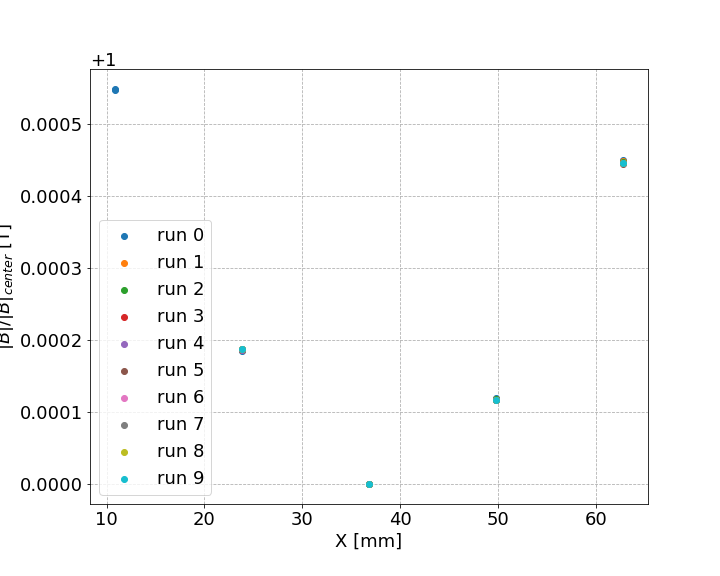

In [463]:
fig, ax = plt.subplots()
for run in df.run.unique():
    df_ = df.query(f'run == {run}').copy()
    ax.scatter(df_['magnet_X_mm'], df_['NMR [T]']/df_.sf, label=f'run {run}')

ax.set_xlabel('X [mm]')
ax.set_ylabel(r'$|B| / |B|_{center}$ [T]')
ax.legend();

In [464]:
df.query('run == 0')

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_X,...,Zaber_Meas_Encoder_Z,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta,magnet_X_mm,magnet_Y_mm,magnet_Z_mm,run,sf
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-06-14 09:33:45,6/14/2021 9:33:45 AM,192.053817,22.866100,1.048830,0.0,0.0,0.0,0.0,422190.0,164917.96875,...,1629710.0,636605.46875,0.0,0.000000,0.000000,10.900000,105.159766,132.048828,0,1.048254
2021-06-14 09:34:52,6/14/2021 9:34:52 AM,192.053760,23.267900,1.048828,0.0,422190.0,366402.0,1629710.0,422190.0,164917.96875,...,1629710.0,636605.46875,67.0,0.018611,0.000775,10.900000,105.159766,132.048828,0,1.048254
2021-06-14 09:35:14,6/14/2021 9:35:14 AM,192.053703,23.298350,1.048448,0.0,455340.0,366402.0,1629710.0,455340.0,177867.18750,...,1629710.0,636605.46875,89.0,0.024722,0.001030,23.849219,105.159766,132.048828,0,1.048254
2021-06-14 09:35:37,6/14/2021 9:35:37 AM,192.053760,23.327583,1.048254,0.0,488490.0,366402.0,1629710.0,488490.0,190816.40625,...,1629710.0,636605.46875,112.0,0.031111,0.001296,36.798437,105.159766,132.048828,0,1.048254
2021-06-14 09:36:32,6/14/2021 9:36:32 AM,192.053760,23.394033,1.048379,0.0,521640.0,366402.0,1629710.0,521640.0,203765.62500,...,1629710.0,636605.46875,167.0,0.046389,0.001933,49.747656,105.159766,132.048828,0,1.048254
2021-06-14 09:37:26,6/14/2021 9:37:26 AM,192.053647,23.455233,1.048725,0.0,554790.0,366402.0,1629710.0,554790.0,216714.84375,...,1629710.0,636605.46875,221.0,0.061389,0.002558,62.696875,105.159766,132.048828,0,1.048254


In [465]:
df.query('run == 4')

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_X,...,Zaber_Meas_Encoder_Z,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta,magnet_X_mm,magnet_Y_mm,magnet_Z_mm,run,sf
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-06-14 09:50:58,6/14/2021 9:50:58 AM,192.053363,23.961033,1.048430,0.0,455340.0,366402.0,1629710.0,455340.0,177867.18750,...,1629710.0,636605.46875,1033.0,0.286944,0.011956,23.849219,105.159766,132.048828,4,1.048234
2021-06-14 09:51:21,6/14/2021 9:51:21 AM,192.053420,23.968500,1.048234,0.0,488490.0,366402.0,1629710.0,488490.0,190816.40625,...,1629710.0,636605.46875,1056.0,0.293333,0.012222,36.798437,105.159766,132.048828,4,1.048234
2021-06-14 09:52:16,6/14/2021 9:52:16 AM,192.053420,23.985367,1.048358,0.0,521640.0,366402.0,1629710.0,521640.0,203765.62500,...,1629710.0,636605.46875,1111.0,0.308611,0.012859,49.747656,105.159766,132.048828,4,1.048234
2021-06-14 09:53:11,6/14/2021 9:53:11 AM,192.053420,24.001233,1.048703,0.0,554790.0,366402.0,1629710.0,554790.0,216714.84375,...,1629710.0,636605.46875,1166.0,0.323889,0.013495,62.696875,105.159766,132.048828,4,1.048234


In [466]:
df.query('run == 5')

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_X,...,Zaber_Meas_Encoder_Z,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta,magnet_X_mm,magnet_Y_mm,magnet_Z_mm,run,sf
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-06-14 10:16:02,6/14/2021 10:16:02 AM,192.053363,24.205133,1.048398,0.0,455340.0,366402.0,1629710.0,455340.0,177867.18750,...,1629710.0,636605.46875,2537.0,0.704722,0.029363,23.849219,105.159766,132.048828,5,1.048201
2021-06-14 10:16:24,6/14/2021 10:16:24 AM,192.053363,24.206883,1.048201,0.0,488490.0,366402.0,1629710.0,488490.0,190816.40625,...,1629710.0,636605.46875,2559.0,0.710833,0.029618,36.798437,105.159766,132.048828,5,1.048201
2021-06-14 10:17:18,6/14/2021 10:17:18 AM,192.053420,24.211150,1.048323,0.0,521640.0,366402.0,1629710.0,521640.0,203765.62500,...,1629710.0,636605.46875,2613.0,0.725833,0.030243,49.747656,105.159766,132.048828,5,1.048201
2021-06-14 10:18:13,6/14/2021 10:18:13 AM,192.053250,24.215367,1.048668,0.0,554790.0,366402.0,1629710.0,554790.0,216714.84375,...,1629710.0,636605.46875,2668.0,0.741111,0.030880,62.696875,105.159766,132.048828,5,1.048201


# Checking B_Hall / B_NMR vs. Current

- In Darren's analysis, we see an anomalous point around 135 A
- Can I confirm this point?
- I will not do any corrections (temp, current)

In [467]:
files = ['2021-06-15 073806.txt',
         '2021-06-16 074548.txt',
         '2021-08-05 131140.txt',
         '2021-08-05 134251.txt',
         '2021-08-05 145325.txt',
        ]

nmr_low = [False,
           False,
           False,
           True,
           False,
          ]

In [468]:
i = 0
dfs = []
for f, nl in zip(files, nmr_low):
    df_ = load_data(ddir+f, low_NMR=nl)
    # set runs
    run_list = []
    for index, new in enumerate(np.concatenate([[False], np.diff(df_['magnet_X_mm'])<0])):
        if new:
            i+=1
        run_list.append(int(i))
    df_.loc[:, 'run'] = run_list
    # new run for next file
    i+=1
    # find field value at Hall probe location
    sf_list = []
    for r in df_.run:
        sf = df_[np.isclose(df_.magnet_X_mm.values, 34.7265625, 1e-2, 1e-2) & (df_.run == r)].iloc[0]['NMR [T]']
        sf_list.append(sf)
    df_['sf'] = sf_list    
    # whether low or high?
    df_.loc[:, 'low_NMR'] = nl
    dfs.append(df_)

df = pd.concat(dfs, ignore_index=False)
# redo delta time from first file
df['seconds_delta'] = (df.index - df.index[0]).total_seconds()
df['hours_delta'] = (df.index - df.index[0]).total_seconds()/60**2
df['days_delta'] = (df.index - df.index[0]).total_seconds()/(24*60**2)
# cut low point that not all measurements have
df = df.query('magnet_X_mm > 11').copy()

In [469]:
df1d_192 = df.query('run == 5').copy()

In [470]:
df1d_192

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_X,...,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta,magnet_X_mm,magnet_Y_mm,magnet_Z_mm,run,sf,low_NMR
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-06-15 14:29:28,6/15/2021 2:29:28 PM,192.053080,24.342450,1.050094,0.0,424842.0,416169.0,1649035.0,424842.0,165953.90625,...,644154.296875,24681.0,6.855833,0.285660,11.935937,124.6,124.5,5,1.049794,False
2021-06-15 14:29:49,6/15/2021 2:29:49 PM,192.053023,24.342700,1.050075,0.0,427494.0,416169.0,1649035.0,427494.0,166989.84375,...,644154.296875,24702.0,6.861667,0.285903,12.971875,124.6,124.5,5,1.049794,False
2021-06-15 14:30:10,6/15/2021 2:30:10 PM,192.053080,24.342950,1.050056,0.0,430146.0,416169.0,1649035.0,430146.0,168025.78125,...,644154.296875,24723.0,6.867500,0.286146,14.007812,124.6,124.5,5,1.049794,False
2021-06-15 14:30:31,6/15/2021 2:30:31 PM,192.053080,24.343233,1.050037,0.0,432798.0,416169.0,1649035.0,432798.0,169061.71875,...,644154.296875,24744.0,6.873333,0.286389,15.043750,124.6,124.5,5,1.049794,False
2021-06-15 14:30:52,6/15/2021 2:30:52 PM,192.053137,24.343533,1.050019,0.0,435450.0,416169.0,1649035.0,435450.0,170097.65625,...,644154.296875,24765.0,6.879167,0.286632,16.079687,124.6,124.5,5,1.049794,False
2021-06-15 14:31:13,6/15/2021 2:31:13 PM,192.053080,24.343733,1.050000,0.0,438102.0,416169.0,1649035.0,438102.0,171133.59375,...,644154.296875,24786.0,6.885000,0.286875,17.115625,124.6,124.5,5,1.049794,False
2021-06-15 14:31:34,6/15/2021 2:31:34 PM,192.053080,24.344083,1.049982,0.0,440754.0,416169.0,1649035.0,440754.0,172169.53125,...,644154.296875,24807.0,6.890833,0.287118,18.151563,124.6,124.5,5,1.049794,False
2021-06-15 14:31:55,6/15/2021 2:31:55 PM,192.053080,24.344300,1.049965,0.0,443406.0,416169.0,1649035.0,443406.0,173205.46875,...,644154.296875,24828.0,6.896667,0.287361,19.187500,124.6,124.5,5,1.049794,False
2021-06-15 14:32:16,6/15/2021 2:32:16 PM,192.053080,24.344617,1.049948,0.0,446058.0,416169.0,1649035.0,446058.0,174241.40625,...,644154.296875,24849.0,6.902500,0.287604,20.223438,124.6,124.5,5,1.049794,False


In [471]:
df.run.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [472]:
df['Magnet Current [V]']

Datetime
2021-06-15 07:39:35    224.061247
2021-06-15 07:39:56    224.061303
2021-06-15 07:40:17    224.061360
2021-06-15 07:40:38    224.061303
2021-06-15 07:40:59    224.061360
                          ...    
2021-08-05 15:11:00    128.037143
2021-08-05 15:11:33    128.037143
2021-08-05 15:11:54    128.037143
2021-08-05 15:12:15    128.037200
2021-08-05 15:12:36    128.037143
Name: Magnet Current [V], Length: 642, dtype: float64

In [473]:
dfs[0].magnet_X_mm.unique()

array([10.9      , 11.9359375, 12.971875 , 14.0078125, 15.04375  ,
       16.0796875, 17.115625 , 18.1515625, 19.1875   , 20.2234375,
       21.259375 , 22.2953125, 23.33125  , 24.3671875, 25.403125 ,
       26.4390625, 27.475    , 28.5109375, 29.546875 , 30.5828125,
       31.61875  , 32.6546875, 33.690625 , 34.7265625, 35.7625   ,
       36.7984375, 37.834375 , 38.8703125, 39.90625  , 40.9421875,
       41.978125 , 43.0140625, 44.05     , 45.0859375, 46.121875 ,
       47.1578125, 48.19375  , 49.2296875, 50.265625 , 51.3015625,
       52.3375   , 53.3734375, 54.409375 , 55.4453125, 56.48125  ,
       57.5171875, 58.553125 , 59.5890625, 60.625    , 61.6609375,
       62.696875 ])

In [474]:
df

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_X,...,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta,magnet_X_mm,magnet_Y_mm,magnet_Z_mm,run,sf,low_NMR
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-06-15 07:39:35,6/15/2021 7:39:35 AM,224.061247,29.203917,1.160143,0.0,424842.0,416169.0,1649035.0,424842.0,165953.90625,...,644154.296875,88.0,0.024444,0.001019,11.935937,124.6,124.500000,0,1.159681,False
2021-06-15 07:39:56,6/15/2021 7:39:56 AM,224.061303,29.203850,1.160112,0.0,427494.0,416169.0,1649035.0,427494.0,166989.84375,...,644154.296875,109.0,0.030278,0.001262,12.971875,124.6,124.500000,0,1.159681,False
2021-06-15 07:40:17,6/15/2021 7:40:17 AM,224.061360,29.203833,1.160081,0.0,430146.0,416169.0,1649035.0,430146.0,168025.78125,...,644154.296875,130.0,0.036111,0.001505,14.007812,124.6,124.500000,0,1.159681,False
2021-06-15 07:40:38,6/15/2021 7:40:38 AM,224.061303,29.203733,1.160051,0.0,432798.0,416169.0,1649035.0,432798.0,169061.71875,...,644154.296875,151.0,0.041944,0.001748,15.043750,124.6,124.500000,0,1.159681,False
2021-06-15 07:40:59,6/15/2021 7:40:59 AM,224.061360,29.203683,1.160021,0.0,435450.0,416169.0,1649035.0,435450.0,170097.65625,...,644154.296875,172.0,0.047778,0.001991,16.079687,124.6,124.500000,0,1.159681,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-05 15:11:00,8/5/2021 3:11:00 PM,128.037143,15.646083,0.734355,0.0,544182.0,416169.0,1649040.0,544182.0,212571.09375,...,644156.250000,4433573.0,1231.548056,51.314502,58.553125,124.6,124.498047,12,0.734287,False
2021-08-05 15:11:33,8/5/2021 3:11:33 PM,128.037143,15.646000,0.734361,0.0,546834.0,416169.0,1649040.0,546834.0,213607.03125,...,644156.250000,4433606.0,1231.557222,51.314884,59.589063,124.6,124.498047,12,0.734287,False
2021-08-05 15:11:54,8/5/2021 3:11:54 PM,128.037143,15.645990,0.734368,0.0,549486.0,416169.0,1649040.0,549486.0,214642.96875,...,644156.250000,4433627.0,1231.563056,51.315127,60.625000,124.6,124.498047,12,0.734287,False


<IPython.core.display.Javascript object>


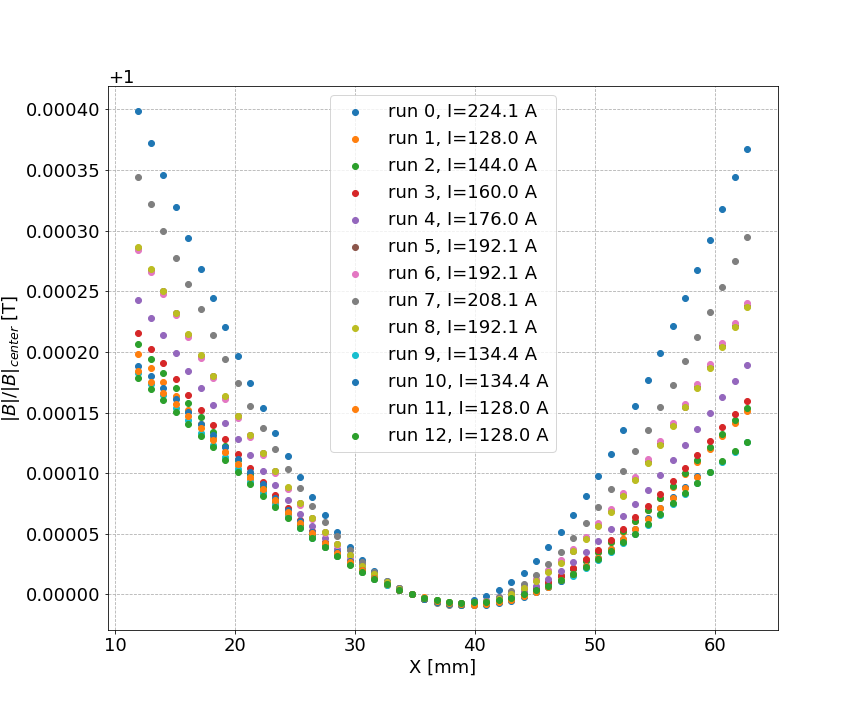

In [475]:
fig, ax = plt.subplots(figsize=(12, 10))
for run in df.run.unique():
    df_ = df.query(f'run == {run}').copy()
    ax.scatter(df_['magnet_X_mm'], df_['NMR [T]']/df_.sf, label=f'run {run}, I={df_["Magnet Current [V]"].mean():0.1f} A')

ax.set_xlabel('X [mm]')
ax.set_ylabel(r'$|B| / |B|_{center}$ [T]')
ax.legend();

<IPython.core.display.Javascript object>


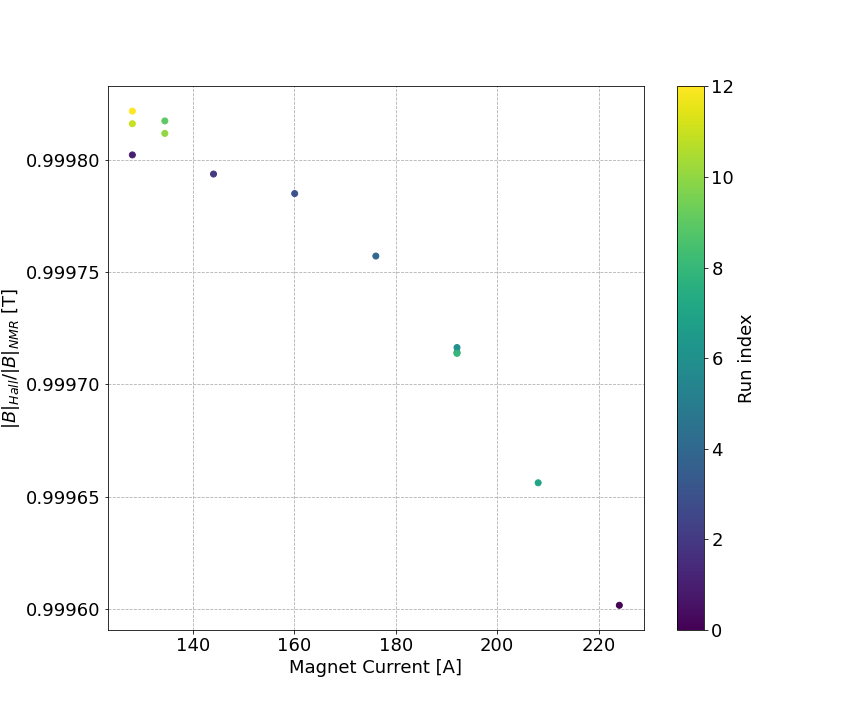

0: X=11.94, Y=124.60, Z=124.50
1: X=11.94, Y=124.60, Z=124.50
2: X=11.94, Y=124.60, Z=124.50
3: X=11.94, Y=124.60, Z=124.50
4: X=11.94, Y=124.60, Z=124.50
5: X=11.94, Y=124.60, Z=124.50
6: X=11.94, Y=124.60, Z=124.50
7: X=11.94, Y=124.60, Z=124.50
8: X=11.94, Y=124.60, Z=124.50
9: X=11.94, Y=124.60, Z=124.50
10: X=11.94, Y=124.60, Z=124.50
11: X=11.94, Y=124.60, Z=124.50
12: X=11.94, Y=124.60, Z=124.50


Text(0, 0.5, '$|B|_{Hall} / |B|_{NMR}$ [T]')

In [476]:
fig, ax = plt.subplots(figsize=(12, 10))
Is = []
Brs = []
rs = df.run.unique()
for run in df.run.unique():
    df_ = df.query(f'run == {run}').copy().iloc[0]
    print(f'{run}: X={df_.magnet_X_mm:0.2f}, Y={df_.magnet_Y_mm:0.2f}, Z={df_.magnet_Z_mm:0.2f}')
    Is.append(df_["Magnet Current [V]"].mean())
    Brs.append(df_.sf / df_['NMR [T]'])
    
sc = ax.scatter(Is, Brs, c=rs) #label=f'run {run}, I={df_["Magnet Current [V]"].mean():0.1f} A')
cb = fig.colorbar(sc, label='Run index')

ax.set_xlabel('Magnet Current [A]')
ax.set_ylabel(r'$|B|_{Hall} / |B|_{NMR}$ [T]')
# ax.legend();

In [477]:
len(rs)

13

In [478]:
len(df)

642

In [479]:
np.diff(dfs[0].magnet_X_mm)

array([  0.       ,   1.0359375,   1.0359375,   1.0359375,   1.0359375,
         1.0359375,   1.0359375,   1.0359375,   1.0359375,   1.0359375,
         1.0359375,   1.0359375,   1.0359375,   1.0359375,   1.0359375,
         1.0359375,   1.0359375,   1.0359375,   1.0359375,   1.0359375,
         1.0359375,   1.0359375,   1.0359375,   1.0359375,   1.0359375,
         1.0359375,   1.0359375,   1.0359375,   1.0359375,   1.0359375,
         1.0359375,   1.0359375,   1.0359375,   1.0359375,   1.0359375,
         1.0359375,   1.0359375,   1.0359375,   1.0359375,   1.0359375,
         1.0359375,   1.0359375,   1.0359375,   1.0359375,   1.0359375,
         1.0359375,   1.0359375,   1.0359375,   1.0359375,   1.0359375,
         1.0359375, -50.7609375,   1.0359375,   1.0359375,   1.0359375,
         1.0359375,   1.0359375,   1.0359375,   1.0359375,   1.0359375,
         1.0359375,   1.0359375,   1.0359375,   1.0359375,   1.0359375,
         1.0359375,   1.0359375,   1.0359375,   1.0359375,   1.0

In [480]:
dfs[0].magnet_X_mm.unique()

array([10.9      , 11.9359375, 12.971875 , 14.0078125, 15.04375  ,
       16.0796875, 17.115625 , 18.1515625, 19.1875   , 20.2234375,
       21.259375 , 22.2953125, 23.33125  , 24.3671875, 25.403125 ,
       26.4390625, 27.475    , 28.5109375, 29.546875 , 30.5828125,
       31.61875  , 32.6546875, 33.690625 , 34.7265625, 35.7625   ,
       36.7984375, 37.834375 , 38.8703125, 39.90625  , 40.9421875,
       41.978125 , 43.0140625, 44.05     , 45.0859375, 46.121875 ,
       47.1578125, 48.19375  , 49.2296875, 50.265625 , 51.3015625,
       52.3375   , 53.3734375, 54.409375 , 55.4453125, 56.48125  ,
       57.5171875, 58.553125 , 59.5890625, 60.625    , 61.6609375,
       62.696875 ])

In [481]:
df

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_X,...,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta,magnet_X_mm,magnet_Y_mm,magnet_Z_mm,run,sf,low_NMR
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-06-15 07:39:35,6/15/2021 7:39:35 AM,224.061247,29.203917,1.160143,0.0,424842.0,416169.0,1649035.0,424842.0,165953.90625,...,644154.296875,88.0,0.024444,0.001019,11.935937,124.6,124.500000,0,1.159681,False
2021-06-15 07:39:56,6/15/2021 7:39:56 AM,224.061303,29.203850,1.160112,0.0,427494.0,416169.0,1649035.0,427494.0,166989.84375,...,644154.296875,109.0,0.030278,0.001262,12.971875,124.6,124.500000,0,1.159681,False
2021-06-15 07:40:17,6/15/2021 7:40:17 AM,224.061360,29.203833,1.160081,0.0,430146.0,416169.0,1649035.0,430146.0,168025.78125,...,644154.296875,130.0,0.036111,0.001505,14.007812,124.6,124.500000,0,1.159681,False
2021-06-15 07:40:38,6/15/2021 7:40:38 AM,224.061303,29.203733,1.160051,0.0,432798.0,416169.0,1649035.0,432798.0,169061.71875,...,644154.296875,151.0,0.041944,0.001748,15.043750,124.6,124.500000,0,1.159681,False
2021-06-15 07:40:59,6/15/2021 7:40:59 AM,224.061360,29.203683,1.160021,0.0,435450.0,416169.0,1649035.0,435450.0,170097.65625,...,644154.296875,172.0,0.047778,0.001991,16.079687,124.6,124.500000,0,1.159681,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-05 15:11:00,8/5/2021 3:11:00 PM,128.037143,15.646083,0.734355,0.0,544182.0,416169.0,1649040.0,544182.0,212571.09375,...,644156.250000,4433573.0,1231.548056,51.314502,58.553125,124.6,124.498047,12,0.734287,False
2021-08-05 15:11:33,8/5/2021 3:11:33 PM,128.037143,15.646000,0.734361,0.0,546834.0,416169.0,1649040.0,546834.0,213607.03125,...,644156.250000,4433606.0,1231.557222,51.314884,59.589063,124.6,124.498047,12,0.734287,False
2021-08-05 15:11:54,8/5/2021 3:11:54 PM,128.037143,15.645990,0.734368,0.0,549486.0,416169.0,1649040.0,549486.0,214642.96875,...,644156.250000,4433627.0,1231.563056,51.315127,60.625000,124.6,124.498047,12,0.734287,False


In [482]:
df = df.query('(123 <= magnet_Y_mm <= 126) & (123 <= magnet_Z_mm <= 126)')

In [483]:
df

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_X,...,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta,magnet_X_mm,magnet_Y_mm,magnet_Z_mm,run,sf,low_NMR
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-06-15 07:39:35,6/15/2021 7:39:35 AM,224.061247,29.203917,1.160143,0.0,424842.0,416169.0,1649035.0,424842.0,165953.90625,...,644154.296875,88.0,0.024444,0.001019,11.935937,124.6,124.500000,0,1.159681,False
2021-06-15 07:39:56,6/15/2021 7:39:56 AM,224.061303,29.203850,1.160112,0.0,427494.0,416169.0,1649035.0,427494.0,166989.84375,...,644154.296875,109.0,0.030278,0.001262,12.971875,124.6,124.500000,0,1.159681,False
2021-06-15 07:40:17,6/15/2021 7:40:17 AM,224.061360,29.203833,1.160081,0.0,430146.0,416169.0,1649035.0,430146.0,168025.78125,...,644154.296875,130.0,0.036111,0.001505,14.007812,124.6,124.500000,0,1.159681,False
2021-06-15 07:40:38,6/15/2021 7:40:38 AM,224.061303,29.203733,1.160051,0.0,432798.0,416169.0,1649035.0,432798.0,169061.71875,...,644154.296875,151.0,0.041944,0.001748,15.043750,124.6,124.500000,0,1.159681,False
2021-06-15 07:40:59,6/15/2021 7:40:59 AM,224.061360,29.203683,1.160021,0.0,435450.0,416169.0,1649035.0,435450.0,170097.65625,...,644154.296875,172.0,0.047778,0.001991,16.079687,124.6,124.500000,0,1.159681,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-05 15:11:00,8/5/2021 3:11:00 PM,128.037143,15.646083,0.734355,0.0,544182.0,416169.0,1649040.0,544182.0,212571.09375,...,644156.250000,4433573.0,1231.548056,51.314502,58.553125,124.6,124.498047,12,0.734287,False
2021-08-05 15:11:33,8/5/2021 3:11:33 PM,128.037143,15.646000,0.734361,0.0,546834.0,416169.0,1649040.0,546834.0,213607.03125,...,644156.250000,4433606.0,1231.557222,51.314884,59.589063,124.6,124.498047,12,0.734287,False
2021-08-05 15:11:54,8/5/2021 3:11:54 PM,128.037143,15.645990,0.734368,0.0,549486.0,416169.0,1649040.0,549486.0,214642.96875,...,644156.250000,4433627.0,1231.563056,51.315127,60.625000,124.6,124.498047,12,0.734287,False


<IPython.core.display.Javascript object>


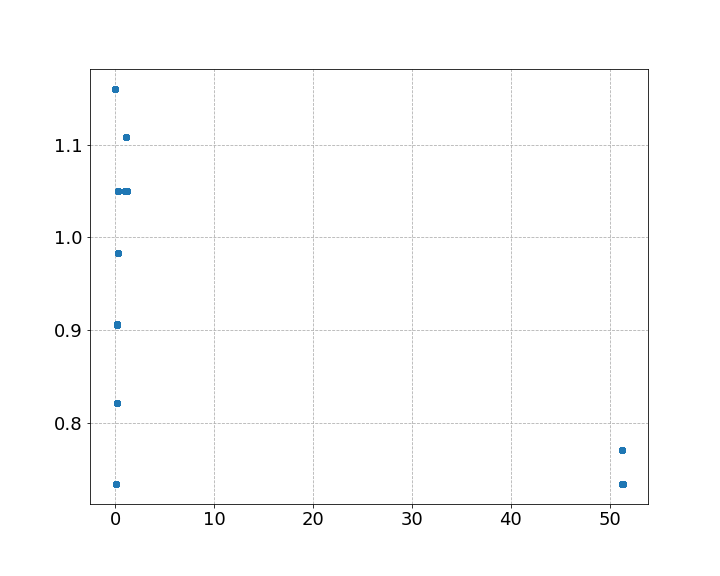

In [484]:
fig, ax = plt.subplots()

ax.scatter(df.days_delta, df['NMR [T]'])

# 3D Scan (temperature)

In [485]:
# tempcol = 'Yoke (center magnet)'
tempcol = 'Yoke (near pole)'

In [486]:
# final 3d scan
slowfile = ddir+'2021-06-18 102833.txt'
tempfile = ddir+'2021-06-18 102833slow.txt'

# first 3d scan (better grid)
# note Zaber labels messed up for tempfile but not slowfile
# slowfile = ddir+'2021-06-16 114150.txt'
# tempfile = ddir+'2021-06-16 114146slow.txt'

# first 3d scan at 192 (worse grid)
# note Zaber labels messed up for tempfile but not slowfile
# slowfile = ddir+'2021-06-15 145245.txt'
# tempfile = ddir+'2021-06-15 145241slow.txt'

In [487]:
df1d_192.head()

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_X,...,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta,magnet_X_mm,magnet_Y_mm,magnet_Z_mm,run,sf,low_NMR
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-06-15 14:29:28,6/15/2021 2:29:28 PM,192.053080,24.342450,1.050094,0.0,424842.0,416169.0,1649035.0,424842.0,165953.90625,...,644154.296875,24681.0,6.855833,0.285660,11.935937,124.6,124.5,5,1.049794,False
2021-06-15 14:29:49,6/15/2021 2:29:49 PM,192.053023,24.342700,1.050075,0.0,427494.0,416169.0,1649035.0,427494.0,166989.84375,...,644154.296875,24702.0,6.861667,0.285903,12.971875,124.6,124.5,5,1.049794,False
2021-06-15 14:30:10,6/15/2021 2:30:10 PM,192.053080,24.342950,1.050056,0.0,430146.0,416169.0,1649035.0,430146.0,168025.78125,...,644154.296875,24723.0,6.867500,0.286146,14.007812,124.6,124.5,5,1.049794,False
2021-06-15 14:30:31,6/15/2021 2:30:31 PM,192.053080,24.343233,1.050037,0.0,432798.0,416169.0,1649035.0,432798.0,169061.71875,...,644154.296875,24744.0,6.873333,0.286389,15.043750,124.6,124.5,5,1.049794,False
2021-06-15 14:30:52,6/15/2021 2:30:52 PM,192.053137,24.343533,1.050019,0.0,435450.0,416169.0,1649035.0,435450.0,170097.65625,...,644154.296875,24765.0,6.879167,0.286632,16.079687,124.6,124.5,5,1.049794,False


In [488]:
df = load_data(slowfile)
df_temp = load_data(tempfile)

In [489]:
df

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Micron_Y,Zaber_Meas_Encoder_Z,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta,magnet_X_mm,magnet_Y_mm,magnet_Z_mm
Datetime,,,,,,,,,,,,,,,,,,,,
2021-06-18 10:29:42,6/18/2021 10:29:42 AM,192.053873,24.337883,1.050116,0.0,422190.0,390569.0,1623435.0,422190.0,164917.96875,390569.0,152566.015625,1623435.0,634154.296875,0.0,0.000000,0.000000,10.900000,114.6,134.5
2021-06-18 10:29:58,6/18/2021 10:29:58 AM,192.053817,24.337883,1.050112,0.0,422190.0,390569.0,1628555.0,422190.0,164917.96875,390569.0,152566.015625,1628555.0,636154.296875,16.0,0.004444,0.000185,10.900000,114.6,132.5
2021-06-18 10:30:13,6/18/2021 10:30:13 AM,192.053930,24.337933,1.050108,0.0,422190.0,390569.0,1633675.0,422190.0,164917.96875,390569.0,152566.015625,1633675.0,638154.296875,31.0,0.008611,0.000359,10.900000,114.6,130.5
2021-06-18 10:30:27,6/18/2021 10:30:27 AM,192.053760,24.337883,1.050104,0.0,422190.0,390569.0,1638795.0,422190.0,164917.96875,390569.0,152566.015625,1638795.0,640154.296875,45.0,0.012500,0.000521,10.900000,114.6,128.5
2021-06-18 10:30:42,6/18/2021 10:30:42 AM,192.053760,24.337917,1.050102,0.0,422190.0,390569.0,1643915.0,422190.0,164917.96875,390569.0,152566.015625,1643915.0,642154.296875,60.0,0.016667,0.000694,10.900000,114.6,126.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-19 16:16:23,6/19/2021 4:16:23 PM,192.053760,24.397367,1.050008,0.0,554790.0,441769.0,1654155.0,554790.0,216714.84375,441769.0,172566.015625,1654155.0,646154.296875,107201.0,29.778056,1.240752,62.696875,134.6,122.5
2021-06-19 16:16:39,6/19/2021 4:16:39 PM,192.053590,24.397400,1.050008,0.0,554790.0,441769.0,1659275.0,554790.0,216714.84375,441769.0,172566.015625,1659275.0,648154.296875,107217.0,29.782500,1.240938,62.696875,134.6,120.5
2021-06-19 16:16:55,6/19/2021 4:16:55 PM,192.053703,24.397450,1.050008,0.0,554790.0,441769.0,1664395.0,554790.0,216714.84375,441769.0,172566.015625,1664395.0,650154.296875,107233.0,29.786944,1.241123,62.696875,134.6,118.5


In [490]:
df_temp

,Time,Magnet Current [A],Magnet Voltage [V],Coil 1,Coil 2,LCW in Coil1,LCW out Coil 1,LCW in Coil 2,LCW out Coil 2,Yoke (near pole),...,Zaber_Meas_Encoder_Y,Zaber_Meas_Micron_Y,Zaber_Meas_Encoder_Z,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta,magnet_X_mm,magnet_Y_mm,magnet_Z_mm
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-06-18 10:29:10,6/18/2021 10:29:10 AM,192.053817,24.337850,43.751015,43.565712,30.356296,31.888596,31.016964,36.502316,26.513939,...,390569.0,152566.015625,1623435.0,634154.296875,0.0,0.000000,0.000000,10.9,114.6,134.5
2021-06-18 10:37:49,6/18/2021 10:37:49 AM,192.053760,24.337683,43.726158,43.578823,30.392462,31.927990,30.885773,36.495209,26.499577,...,400809.0,156566.015625,1674635.0,654154.296875,519.0,0.144167,0.006007,10.9,118.6,114.5
2021-06-18 10:46:01,6/18/2021 10:46:01 AM,192.053760,24.336667,43.700665,43.618713,30.374596,31.923300,30.979866,36.489624,26.502901,...,416169.0,162566.015625,1659275.0,648154.296875,1011.0,0.280833,0.011701,10.9,124.6,120.5
2021-06-18 10:54:32,6/18/2021 10:54:32 AM,192.053760,24.336900,43.715141,43.559544,30.413282,31.953884,30.903425,36.538189,26.506403,...,431529.0,168566.015625,1643915.0,642154.296875,1522.0,0.422778,0.017616,10.9,130.6,126.5
2021-06-18 11:02:50,6/18/2021 11:02:50 AM,192.053760,24.335367,43.664947,43.547501,30.352377,31.893108,30.846647,36.484493,26.485212,...,441769.0,172566.015625,1674635.0,654154.296875,2020.0,0.561111,0.023380,10.9,134.6,114.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-07 08:54:23,7/7/2021 8:54:23 AM,192.053137,23.862917,38.881329,38.135197,29.016785,29.270891,28.442797,32.073765,20.532509,...,390569.0,152566.015625,1623435.0,634154.296875,1635913.0,454.420278,18.934178,10.9,114.6,134.5
2021-07-07 09:02:43,7/7/2021 9:02:43 AM,192.053080,23.981167,40.159618,39.363804,29.568520,29.875706,28.984592,32.827141,20.752722,...,390569.0,152566.015625,1623435.0,634154.296875,1636413.0,454.559167,18.939965,10.9,114.6,134.5
2021-07-07 09:11:03,7/7/2021 9:11:03 AM,192.053080,24.060017,41.060688,40.189922,30.062044,30.384739,29.528030,33.420433,20.986700,...,390569.0,152566.015625,1623435.0,634154.296875,1636913.0,454.698056,18.945752,10.9,114.6,134.5


In [491]:
# same time deltas
df_temp['seconds_delta'] = (df_temp.index - df.index[0]).total_seconds()
df_temp['hours_delta'] = (df_temp.index - df.index[0]).total_seconds()/60**2
df_temp['days_delta'] = (df_temp.index - df.index[0]).total_seconds()/(24*60**2)

In [492]:
len(df)

6171

In [493]:
len(df_temp)

3278

In [494]:
# final 3d scan
df_temp = df_temp.query('Datetime < "2021-06-19 16:17:00"')
# first 3d scan (better grid)
# useless
# df_temp = df_temp.query('Datetime < "2021-06-19 16:17:00"')

In [495]:
len(df_temp)

215

<IPython.core.display.Javascript object>


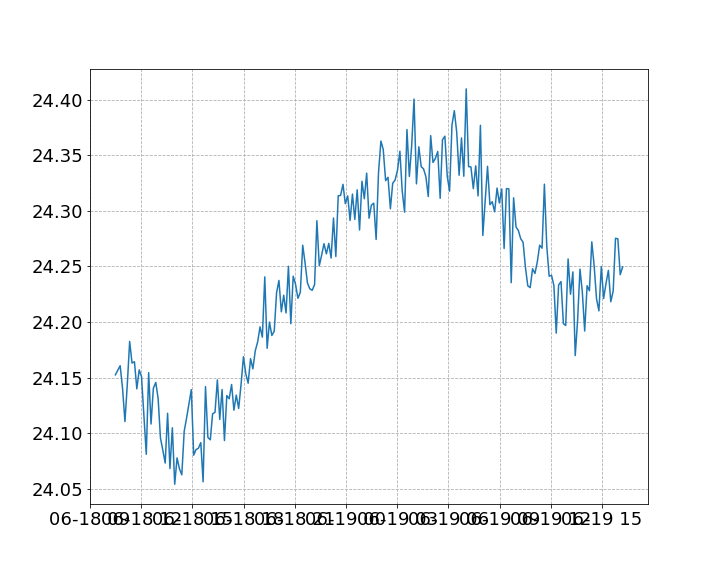

In [496]:
fig, ax = plt.subplots()

ax.plot(df_temp.index, df_temp['Yoke (center magnet)'])

<IPython.core.display.Javascript object>


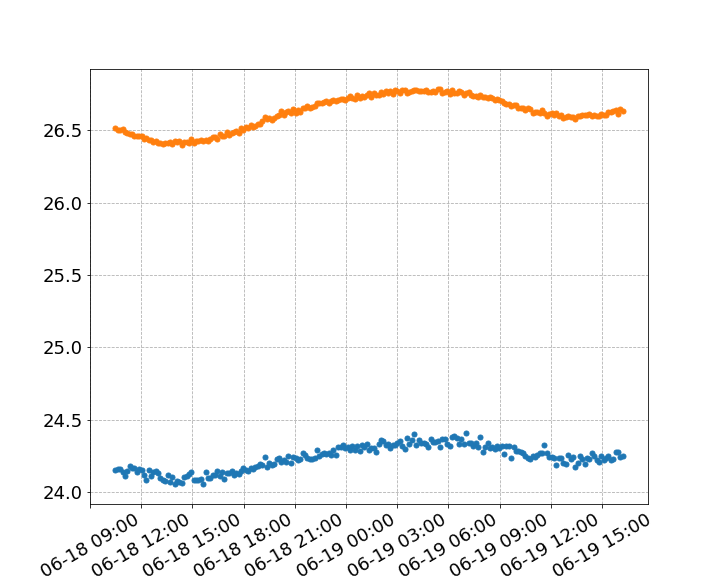

<AxesSubplot:>

In [497]:
fig, ax = plt.subplots()

datetime_plt(ax, df_temp.index, df_temp['Yoke (center magnet)'], s=5, label=None, nmaj=8)
datetime_plt(ax, df_temp.index, df_temp['Yoke (near pole)'], s=5, label=None, nmaj=8)

<IPython.core.display.Javascript object>


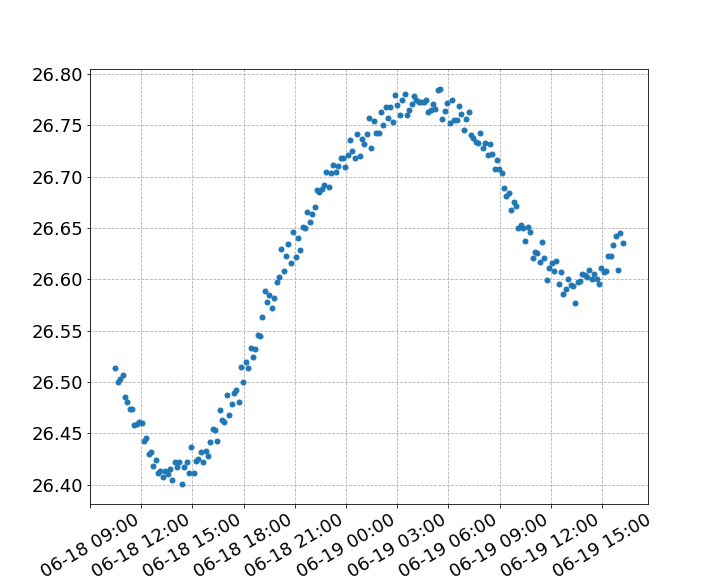

<AxesSubplot:>

In [498]:
fig, ax = plt.subplots()

datetime_plt(ax, df_temp.index, df_temp[tempcol], s=5, label=None, nmaj=8)

<IPython.core.display.Javascript object>


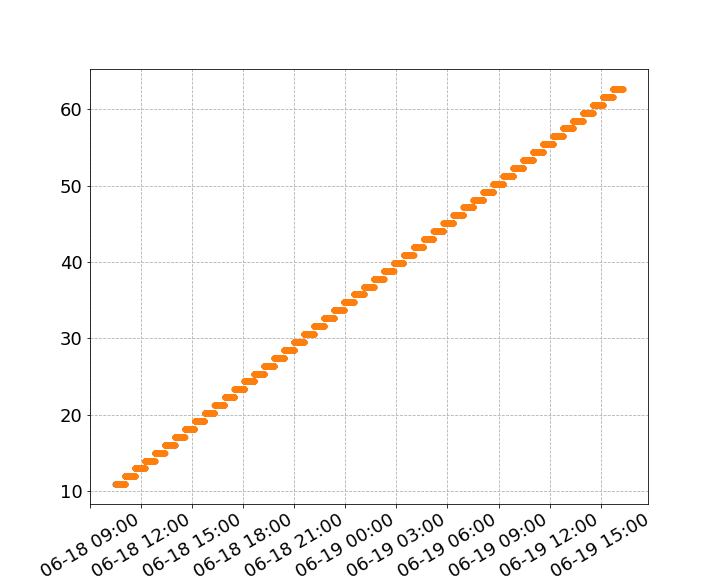

<AxesSubplot:>

In [499]:
fig, ax = plt.subplots()

datetime_plt(ax, df_temp.index, df_temp['magnet_X_mm'], s=5, label=None, nmaj=8)
datetime_plt(ax, df.index, df['magnet_X_mm'], s=5, label=None, nmaj=8)

In [500]:
t_interp = interp1d(df_temp.seconds_delta, df_temp[tempcol], kind='linear', fill_value="extrapolate")

In [501]:
df_temp.seconds_delta

Datetime
2021-06-18 10:29:10       -32.0
2021-06-18 10:37:49       487.0
2021-06-18 10:46:01       979.0
2021-06-18 10:54:32      1490.0
2021-06-18 11:02:50      1988.0
                         ...   
2021-06-19 15:39:39    104997.0
2021-06-19 15:47:49    105487.0
2021-06-19 15:56:02    105980.0
2021-06-19 16:04:26    106484.0
2021-06-19 16:12:53    106991.0
Name: seconds_delta, Length: 215, dtype: float64

In [502]:
t_interp([20000, 20001])

array([26.44158769, 26.44161454])

In [503]:
df.loc[:, tempcol] = t_interp(df.seconds_delta)

In [504]:
df

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_X,...,Zaber_Meas_Micron_Y,Zaber_Meas_Encoder_Z,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta,magnet_X_mm,magnet_Y_mm,magnet_Z_mm,Yoke (near pole)
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-06-18 10:29:42,6/18/2021 10:29:42 AM,192.053873,24.337883,1.050116,0.0,422190.0,390569.0,1623435.0,422190.0,164917.96875,...,152566.015625,1623435.0,634154.296875,0.0,0.000000,0.000000,10.900000,114.6,134.5,26.513053
2021-06-18 10:29:58,6/18/2021 10:29:58 AM,192.053817,24.337883,1.050112,0.0,422190.0,390569.0,1628555.0,422190.0,164917.96875,...,152566.015625,1628555.0,636154.296875,16.0,0.004444,0.000185,10.900000,114.6,132.5,26.512611
2021-06-18 10:30:13,6/18/2021 10:30:13 AM,192.053930,24.337933,1.050108,0.0,422190.0,390569.0,1633675.0,422190.0,164917.96875,...,152566.015625,1633675.0,638154.296875,31.0,0.008611,0.000359,10.900000,114.6,130.5,26.512195
2021-06-18 10:30:27,6/18/2021 10:30:27 AM,192.053760,24.337883,1.050104,0.0,422190.0,390569.0,1638795.0,422190.0,164917.96875,...,152566.015625,1638795.0,640154.296875,45.0,0.012500,0.000521,10.900000,114.6,128.5,26.511808
2021-06-18 10:30:42,6/18/2021 10:30:42 AM,192.053760,24.337917,1.050102,0.0,422190.0,390569.0,1643915.0,422190.0,164917.96875,...,152566.015625,1643915.0,642154.296875,60.0,0.016667,0.000694,10.900000,114.6,126.5,26.511393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-19 16:16:23,6/19/2021 4:16:23 PM,192.053760,24.397367,1.050008,0.0,554790.0,441769.0,1654155.0,554790.0,216714.84375,...,172566.015625,1654155.0,646154.296875,107201.0,29.778056,1.240752,62.696875,134.6,122.5,26.630732
2021-06-19 16:16:39,6/19/2021 4:16:39 PM,192.053590,24.397400,1.050008,0.0,554790.0,441769.0,1659275.0,554790.0,216714.84375,...,172566.015625,1659275.0,648154.296875,107217.0,29.782500,1.240938,62.696875,134.6,120.5,26.630410
2021-06-19 16:16:55,6/19/2021 4:16:55 PM,192.053703,24.397450,1.050008,0.0,554790.0,441769.0,1664395.0,554790.0,216714.84375,...,172566.015625,1664395.0,650154.296875,107233.0,29.786944,1.241123,62.696875,134.6,118.5,26.630088


<IPython.core.display.Javascript object>


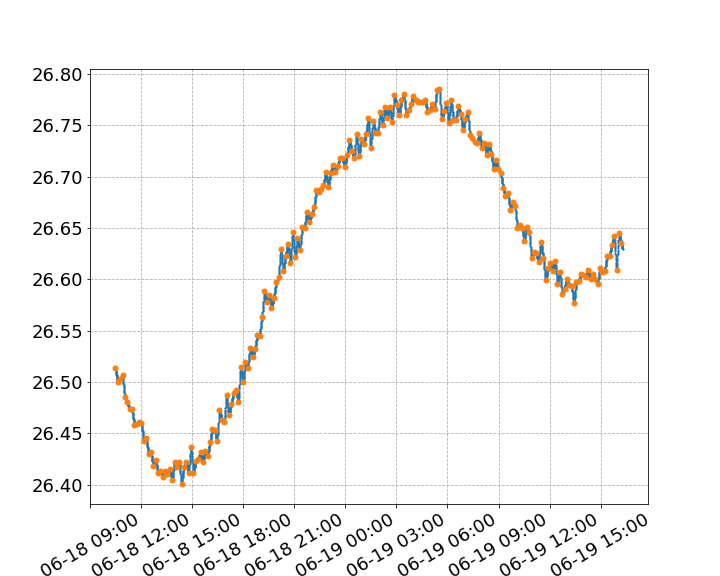

<AxesSubplot:>

In [505]:
fig, ax = plt.subplots()

datetime_plt(ax, df.index, df[tempcol], s=1, label=None, nmaj=8)
datetime_plt(ax, df_temp.index, df_temp[tempcol], s=5, label=None, nmaj=8)


In [506]:
df['Magnet Current [V]'].describe()

count    6171.000000
mean      192.053754
std         0.000177
min       192.053307
25%       192.053703
50%       192.053760
75%       192.053817
max       192.054157
Name: Magnet Current [V], dtype: float64

<IPython.core.display.Javascript object>


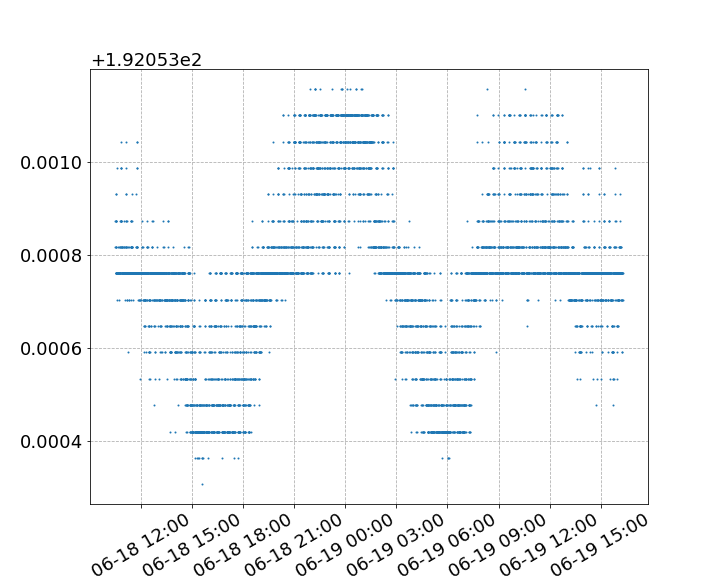

<AxesSubplot:>

In [507]:
fig, ax = plt.subplots()

datetime_plt(ax, df.index, df['Magnet Current [V]'], s=1, label=None, nmaj=8)

In [508]:
ls /home/ckampa/data/hallprobecalib_extras/datafiles/magnet_ramp/2021-02-24/

gap70_B_vs_I_r0z0_0-200_results.txt
gap70_z0_1006_Steel_results.txt
gap75_1006_Steel_ramp_2021-02-24_ideal_B_vs_I_results.txt
gap75_1006_Steel_ramp_2021-02-24_ideal_B_vs_I_results.txt.bak
gap75_B_vs_I_r0z0_0-300_results.txt
gap75_B_vs_I_r0z37.5_results.txt
gap75_B_vs_I_r0z37.5_results.txt.bak
ramp_2021-02-24_guess_2_gap75_B_vs_I_results.txt
ramp_2021-02-24_guess_gap75_B_vs_I_results.txt
ramp_2021-02-24_guess_gap75_B_vs_I_results.txt.bak
ramp_2021-02-24.hall-from-nmr-lin-temp-regress-fits.pkl
ramp_2021-02-24.hall-lin-temp-regress-fits.pkl
ramp_2021-02-24.interp_fcn_Hall.pkl
ramp_2021-02-24.interp_fcn_NMR.pkl
ramp_2021-02-24.nmr-lin-temp-regress-fits.pkl
ramp_2021-02-24.processed-all.pkl
ramp_2021-02-24.processed-hyst.pkl
ramp_2021-02-24_processed.pkl
ramp_2021-02-24.processed-ramp.pkl
ramp_2021-02-24.raw.pkl
ramp_2021-02-24_raw.pkl
ramp_2021-02-24.run-info_hall_regression.pkl
ramp_2021-02-24.run-info_nmr_regression.pkl
ramp_2021-02-24.run-info.pkl
ramp_2021-02-24.run-info_temp_params.pk

In [509]:
df_fits = pd.read_pickle('/home/ckampa/data/hallprobecalib_extras/datafiles/magnet_ramp/2021-02-24/ramp_2021-02-24.run-info_temp_params.pkl')

In [510]:
df_fits = df_fits.query('I > 100').copy()

In [511]:
df_fits

,t0,tf,ramp,hyst,adc,chiller,NMR,B_NMR,I,hours_data,num_meas,run_num,A_NMR,A_NMR_err,B_NMR_err,A_Hall,A_Hall_err,B_Hall,B_Hall_err,A_NMR_shift
0,2021-02-24 09:57:00,2021-02-25 10:35:45,False,True,"750,000",True,True,-0.000099,240.069467,24.645833,1479,0,1.208936,2.759534e-07,1.556902e-07,1.208160,0.000008,-7.204276e-05,4.670637e-06,-0.000293
1,2021-02-25 10:36:15,2021-02-26 11:47:45,False,True,"700,000",True,True,-0.000101,224.065923,25.191667,1512,1,1.163656,5.026206e-07,4.148782e-07,1.163251,0.000015,-1.435938e-04,1.244663e-05,0.001660
2,2021-02-26 11:53:00,2021-03-01 09:12:45,False,True,"750,000",True,True,-0.000090,240.069009,69.329167,4161,2,1.208617,4.751850e-07,2.343931e-07,1.207975,0.000014,-1.285902e-04,7.031922e-06,-0.000612
7,2021-03-03 09:16:30,2021-03-03 17:11:45,True,False,"400,000",True,True,-0.000009,128.038948,7.920833,476,7,0.733990,3.748101e-06,1.888261e-06,0.733983,0.000107,3.052141e-07,5.380731e-05,0.000000
8,2021-03-03 17:15:30,2021-03-04 09:10:45,True,False,"450,000",True,True,-0.000009,144.044132,15.920833,956,8,0.822410,1.304195e-06,8.445336e-07,0.822359,0.000039,-1.299800e-05,2.532098e-05,0.000000
9,2021-03-04 09:14:45,2021-03-04 16:49:45,True,True,"500,000",True,True,-0.000026,160.047885,7.583333,456,9,0.906665,2.951907e-06,2.505055e-06,0.906650,0.000089,2.477332e-05,7.514685e-05,0.000000
10,2021-03-04 16:53:30,2021-03-05 09:25:45,True,False,"550,000",True,True,-0.000040,176.051258,16.537500,993,10,0.983926,4.698783e-07,6.977098e-07,0.983819,0.000014,-2.086247e-05,2.093133e-05,0.000000
11,2021-03-05 09:29:45,2021-03-05 14:00:00,True,True,"600,000",True,True,-0.000060,192.056063,4.504167,271,11,1.051370,2.816349e-07,6.988501e-07,1.051171,0.000008,-3.200959e-05,2.096742e-05,0.000911
12,2021-03-08 07:50:45,2021-03-08 17:36:00,True,True,"600,000",False,True,-0.000063,192.056237,9.754167,586,12,1.050460,6.286550e-07,2.260490e-07,1.050252,0.000019,-6.814714e-05,6.781568e-06,0.000000
13,2021-03-08 17:40:45,2021-03-09 09:15:00,True,False,"650,000",False,True,-0.000079,208.060745,15.570833,935,13,1.109834,1.350088e-06,3.252260e-07,1.109447,0.000041,-7.501107e-05,9.757051e-06,0.000000


<IPython.core.display.Javascript object>


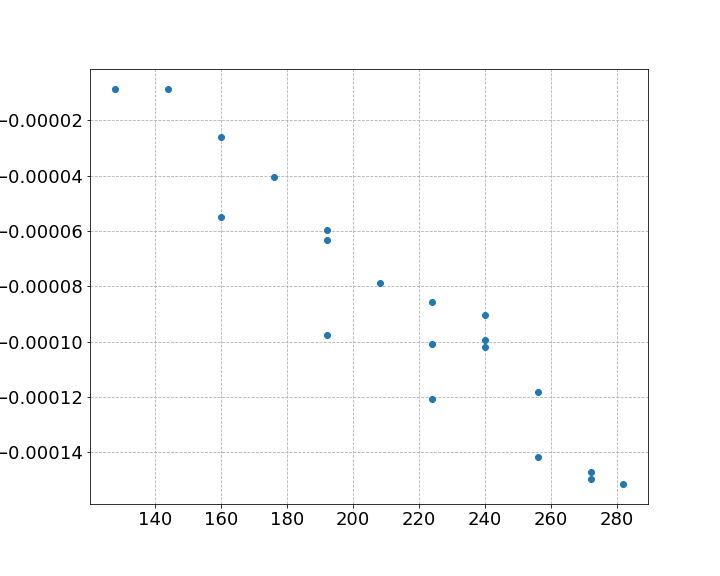

In [512]:
fig, ax = plt.subplots()

ax.scatter(df_fits.I, df_fits.B_NMR)

In [513]:
def lin_mod(x, **params):
    return params['c0'] + params['c1'] * x

In [514]:
model = lm.Model(lin_mod, independent_vars=['x'])
params = lm.Parameters()
params.add('c0', vary=True, value=0)
params.add('c1', vary=True, value=0)
result = model.fit(df_fits.B_NMR.values, x=df_fits.I.values, params=params)

In [515]:
result

In [516]:
temp_coeff = lin_mod(df['Magnet Current [V]'].mean(), **result.params) # T / deg C

In [517]:
temp_coeff

-6.625611329668861e-05

In [518]:
#t0 = df[tempcol].mean()
t0 = 25.6 # match 1d dataset

In [519]:
t0

25.6

In [520]:
df[tempcol].min(), df[tempcol].max()

(26.400946424752476, 26.785405515187378)

In [521]:
dB_vals = temp_coeff * (df[tempcol] - t0)

In [522]:
dB_vals.describe()

count    6171.000000
mean       -0.000068
std         0.000008
min        -0.000079
25%        -0.000075
50%        -0.000068
75%        -0.000060
max        -0.000053
Name: Yoke (near pole), dtype: float64

In [523]:
df[tempcol]

Datetime
2021-06-18 10:29:42    26.513053
2021-06-18 10:29:58    26.512611
2021-06-18 10:30:13    26.512195
2021-06-18 10:30:27    26.511808
2021-06-18 10:30:42    26.511393
                         ...    
2021-06-19 16:16:23    26.630732
2021-06-19 16:16:39    26.630410
2021-06-19 16:16:55    26.630088
2021-06-19 16:17:11    26.629766
2021-06-19 16:17:26    26.629463
Name: Yoke (near pole), Length: 6171, dtype: float64

In [524]:
dB_vals

Datetime
2021-06-18 10:29:42   -0.000060
2021-06-18 10:29:58   -0.000060
2021-06-18 10:30:13   -0.000060
2021-06-18 10:30:27   -0.000060
2021-06-18 10:30:42   -0.000060
                         ...   
2021-06-19 16:16:23   -0.000068
2021-06-19 16:16:39   -0.000068
2021-06-19 16:16:55   -0.000068
2021-06-19 16:17:11   -0.000068
2021-06-19 16:17:26   -0.000068
Name: Yoke (near pole), Length: 6171, dtype: float64

In [562]:
# WRONG SIGN!
# df.loc[:, 'B_corr'] = df['NMR [T]'].values + dB_vals
# corrected
df.loc[:, 'B_corr'] = df['NMR [T]'].values - dB_vals

In [563]:
df.magnet_Y_mm.unique(), df.magnet_Z_mm.unique()

(array([114.6, 116.6, 118.6, 120.6, 122.6, 124.6, 126.6, 128.6, 130.6,
        132.6, 134.6]),
 array([134.5, 132.5, 130.5, 128.5, 126.5, 124.5, 122.5, 120.5, 118.5,
        116.5, 114.5]))

In [564]:
# good grid
df_ = df.query('(magnet_Y_mm == 124.6) & (magnet_Z_mm == 124.5)').copy()
# worse grid
# df_ = df.query('(magnet_Y_mm == 125.6) & (magnet_Z_mm == 125.5)').copy()

In [565]:
len(df_)

51

In [566]:
df_ = df_.query('(magnet_X_mm > 11.9)').copy()

In [567]:
len(df_)

50

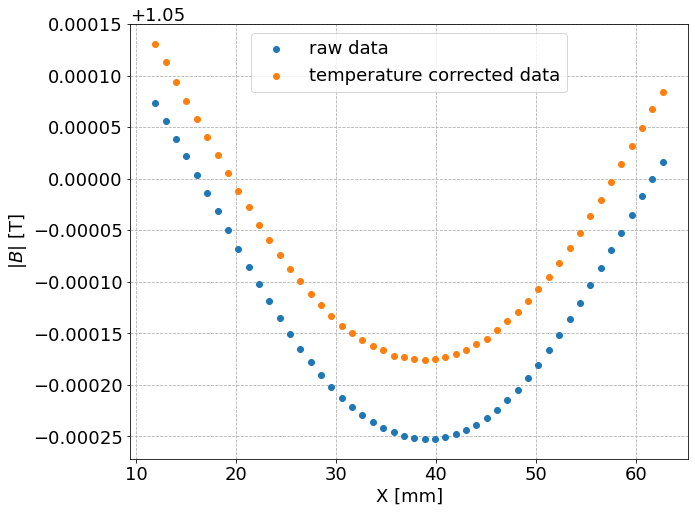

In [568]:
fig, ax = plt.subplots()

# ax.scatter(df_['magnet_X_mm'], df_['NMR [T]']/df_.sf, label=f'run {run}')
ax.scatter(df_['magnet_X_mm'], df_['NMR [T]'], label=f'raw data')
ax.scatter(df_['magnet_X_mm'], df_['B_corr'], label=f'temperature corrected data')

ax.set_xlabel('X [mm]')
# ax.set_ylabel(r'$|B| / |B|_{center}$ [T]')
ax.set_ylabel(r'$|B|$ [T]')
ax.legend();

No handles with labels found to put in legend.


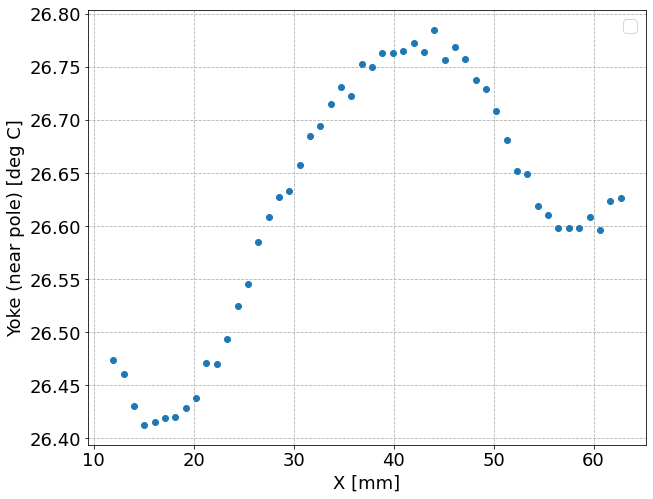

In [569]:
fig, ax = plt.subplots()

# ax.scatter(df_['magnet_X_mm'], df_['NMR [T]']/df_.sf, label=f'run {run}')
ax.scatter(df_['magnet_X_mm'], df_[tempcol])#, label=f'raw data')
# ax.scatter(df_['magnet_X_mm'], df_['B_corr'], label=f'temperature corrected data')

ax.set_xlabel('X [mm]')
# ax.set_ylabel(r'$|B| / |B|_{center}$ [T]')
ax.set_ylabel('Yoke (near pole) [deg C]')
ax.legend();

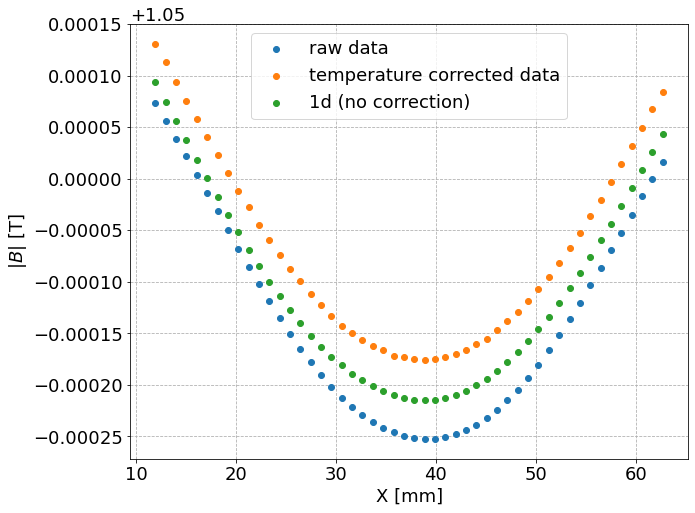

In [570]:
# include 1d
fig, ax = plt.subplots()

# ax.scatter(df_['magnet_X_mm'], df_['NMR [T]']/df_.sf, label=f'run {run}')
ax.scatter(df_['magnet_X_mm'], df_['NMR [T]'], label=f'raw data')
ax.scatter(df_['magnet_X_mm'], df_['B_corr'], label=f'temperature corrected data')
ax.scatter(df1d_192['magnet_X_mm'], df1d_192['NMR [T]'], label=f'1d (no correction)')

ax.set_xlabel('X [mm]')
# ax.set_ylabel(r'$|B| / |B|_{center}$ [T]')
ax.set_ylabel(r'$|B|$ [T]')
ax.legend();

In [571]:
df_.magnet_X_mm.unique()

array([11.9359375, 12.971875 , 14.0078125, 15.04375  , 16.0796875,
       17.115625 , 18.1515625, 19.1875   , 20.2234375, 21.259375 ,
       22.2953125, 23.33125  , 24.3671875, 25.403125 , 26.4390625,
       27.475    , 28.5109375, 29.546875 , 30.5828125, 31.61875  ,
       32.6546875, 33.690625 , 34.7265625, 35.7625   , 36.7984375,
       37.834375 , 38.8703125, 39.90625  , 40.9421875, 41.978125 ,
       43.0140625, 44.05     , 45.0859375, 46.121875 , 47.1578125,
       48.19375  , 49.2296875, 50.265625 , 51.3015625, 52.3375   ,
       53.3734375, 54.409375 , 55.4453125, 56.48125  , 57.5171875,
       58.553125 , 59.5890625, 60.625    , 61.6609375, 62.696875 ])

In [572]:
df1d_192.magnet_X_mm.unique()

array([11.9359375, 12.971875 , 14.0078125, 15.04375  , 16.0796875,
       17.115625 , 18.1515625, 19.1875   , 20.2234375, 21.259375 ,
       22.2953125, 23.33125  , 24.3671875, 25.403125 , 26.4390625,
       27.475    , 28.5109375, 29.546875 , 30.5828125, 31.61875  ,
       32.6546875, 33.690625 , 34.7265625, 35.7625   , 36.7984375,
       37.834375 , 38.8703125, 39.90625  , 40.9421875, 41.978125 ,
       43.0140625, 44.05     , 45.0859375, 46.121875 , 47.1578125,
       48.19375  , 49.2296875, 50.265625 , 51.3015625, 52.3375   ,
       53.3734375, 54.409375 , 55.4453125, 56.48125  , 57.5171875,
       58.553125 , 59.5890625, 60.625    , 61.6609375, 62.696875 ])

In [573]:
sf_3d_raw = df_.query('magnet_X_mm == 34.7265625').iloc[0]['NMR [T]']
sf_3d = df_.query('magnet_X_mm == 34.7265625').iloc[0]['B_corr']
sf_1d = df1d_192.query('magnet_X_mm == 34.7265625').iloc[0]['NMR [T]']

In [574]:
sf_3d_raw, sf_3d, sf_1d

(1.049758548, 1.0498334926609618, 1.049793559)

In [575]:
# scale to Hall probe point

In [576]:
%matplotlib inline

In [577]:
config_plots()

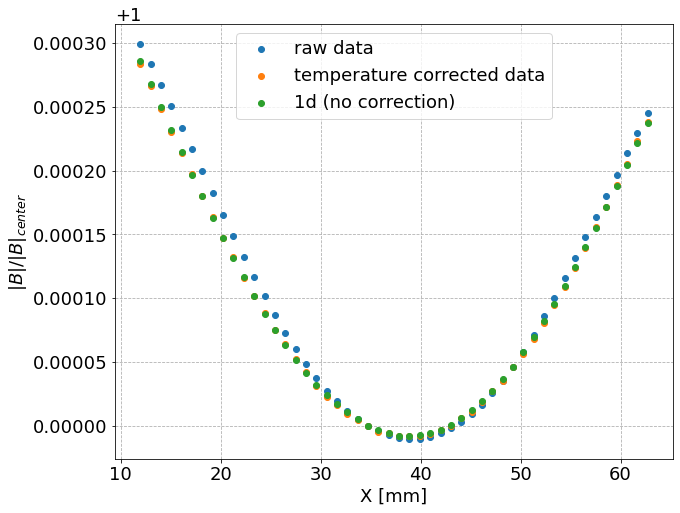

In [578]:
# include 1d
fig, ax = plt.subplots()

# ax.scatter(df_['magnet_X_mm'], df_['NMR [T]']/df_.sf, label=f'run {run}')
ax.scatter(df_['magnet_X_mm'], df_['NMR [T]']/sf_3d_raw, label=f'raw data')
ax.scatter(df_['magnet_X_mm'], df_['B_corr']/sf_3d, label=f'temperature corrected data')
ax.scatter(df1d_192['magnet_X_mm'], df1d_192['NMR [T]']/sf_1d, label=f'1d (no correction)')

ax.set_xlabel('X [mm]')
ax.set_ylabel(r'$|B| / |B|_{center}$')
# ax.set_ylabel(r'$|B|$ [T]')
ax.legend();